## ML using the API

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from nilmtk import DataSet
import pandas as pd

In [2]:
DATA_PATH = "./data/REFIT.h5"
refit = DataSet(DATA_PATH)

In [12]:
def ndir(x):
    """ Show properties and methods with no magic methods """
    return [x for x in dir(x) if not x.__contains__("__")]

Inspiration: https://github.com/nilmtk/nilmtk-contrib/blob/master/sample_notebooks/NILMTK%20API%20Tutorial.ipynb

In [6]:
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

In [7]:
from disaggregate.seq2point import Seq2Point
from disaggregate.seq2seq import Seq2Seq
from disaggregate.bert import BERT

In [5]:
refit.buildings[5].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=5, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=5, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=5, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=4, building=5, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=5, building=5, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=6, building=5, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=7, building=5, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=5, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=9, building=5, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=10, buildin

### Freezer

In [9]:
experiment = {
  "power": {"mains": ["apparent","active"],"appliance": ["apparent","active"]},
  "sample_rate": 60,
  "appliances": ["fridge freezer", "tumble dryer", "washing machine", "dish washer"],
  "methods": {"Seq2Point": Seq2Point({"n_epochs": 5}), "Seq2Seq": Seq2Seq({"n_epochs": 5})},
  "display_predictions": True,
  "train": {    
    "datasets": {
        "Dataport": {
            "path": "data/REFIT.h5",
            "buildings": {
                5: {
                    "start_time": "2014-04-01",
                    "end_time": "2014-07-31"
                    }
                }                
            }
        }
    },
  "test": {
    "datasets": {
        "Dataport": {
            "path": "data/REFIT.h5",
            "buildings": {
                5: {
                    "start_time": "2014-08-01",
                    "end_time": "2014-08-31"
                    }
                }
            }
        },
        "metrics":["rmse"]
    }
}

Joint Testing for all algorithms
Loading data for  Dataport  dataset
Dropping missing values
Generating predictions for : Seq2Point
Generating predictions for : Seq2Seq
............  rmse  ..............
                  Seq2Point     Seq2Seq
fridge freezer    40.942172   42.514711
tumble dryer     411.936300  397.591027
washing machine  288.915131  289.616422
dish washer      107.412269  106.723069


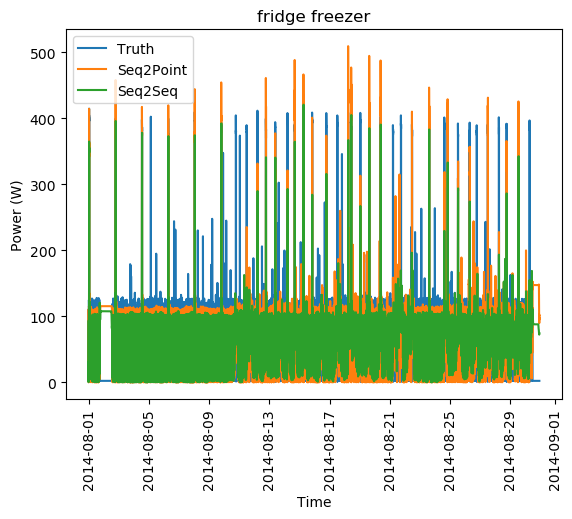

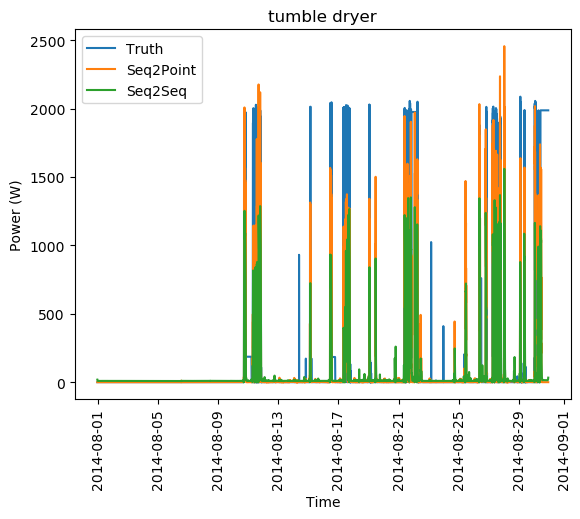

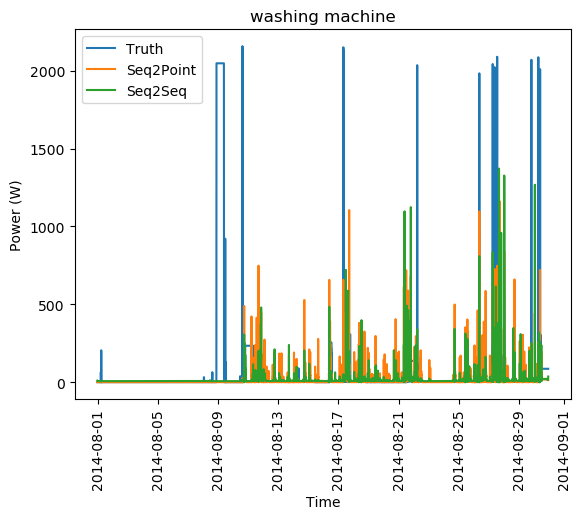

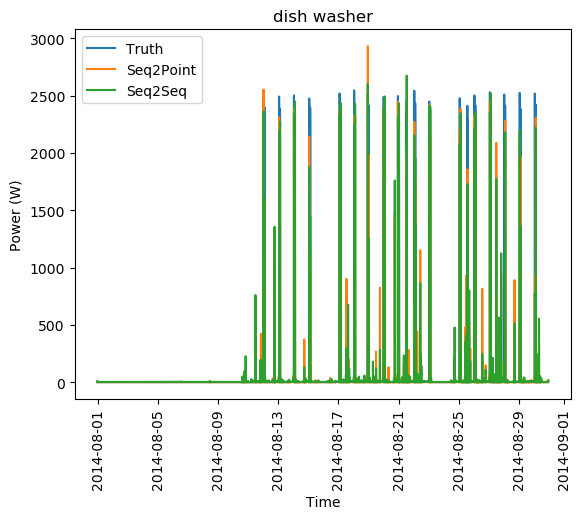

In [10]:
mod = API(experiment)

In [11]:
errors_keys = mod.errors_keys
errors = mod.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Dataport_5_rmse
                  Seq2Point     Seq2Seq
fridge freezer    40.942172   42.514711
tumble dryer     411.936300  397.591027
washing machine  288.915131  289.616422
dish washer      107.412269  106.723069





In [12]:
ndir(mod)

NameError: name 'ndir' is not defined

In [13]:
mod.pred_overall

{'Seq2Point':                            fridge freezer  tumble dryer  washing machine  \
 Unix                                                                       
 2014-08-01 00:00:00+01:00       38.077423           0.0         0.000000   
 2014-08-01 00:01:00+01:00       31.342230           0.0         0.000000   
 2014-08-01 00:02:00+01:00       20.554760           0.0         0.000000   
 2014-08-01 00:03:00+01:00       17.295132           0.0         0.000000   
 2014-08-01 00:04:00+01:00       18.290203           0.0         0.000000   
 ...                                   ...           ...              ...   
 2014-08-30 23:55:00+01:00       94.005272           0.0        15.768143   
 2014-08-30 23:56:00+01:00       96.627457           0.0        16.805231   
 2014-08-30 23:57:00+01:00      101.411041           0.0        17.213049   
 2014-08-30 23:58:00+01:00      102.329147           0.0        16.351969   
 2014-08-30 23:59:00+01:00      101.723740           0.0       

In [14]:
preds = mod.pred_overall["Seq2Seq"]
preds

,fridge freezer,tumble dryer,washing machine,dish washer
Unix,,,,
2014-08-01 00:00:00+01:00,29.807272,18.487532,10.146927,10.249569
2014-08-01 00:01:00+01:00,16.888687,16.815544,9.363804,8.952972
2014-08-01 00:02:00+01:00,6.987330,16.557388,8.691124,6.896937
2014-08-01 00:03:00+01:00,1.464202,15.944372,8.281606,5.305717
2014-08-01 00:04:00+01:00,0.000000,16.004221,8.142694,4.189647
...,...,...,...,...
2014-08-30 23:55:00+01:00,72.901184,27.815054,31.240353,7.861123
2014-08-30 23:56:00+01:00,73.044167,28.414337,32.380375,9.165567
2014-08-30 23:57:00+01:00,73.460861,29.544874,33.154945,10.800397


In [15]:
mod.display_predictions

True

In [22]:
Seq2Point({"n_epochs": 10}).return_network().summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_35 (Conv1D)           (None, 90, 30)            330       
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 83, 30)            7230      
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 78, 40)            7240      
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 74, 50)            10050     
_________________________________________________________________
dropout_21 (Dropout)         (None, 74, 50)            0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 70, 50)            12550     
_________________________________________________________________
dropout_22 (Dropout)         (None, 70, 50)           

In [20]:
BERT({"n_epochs": 10}).return_network().summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 99, 16)            80        
_________________________________________________________________
l_ppool_3 (LPpool)           (None, 50, 16)            0         
_________________________________________________________________
token_and_position_embedding (None, 50, 16, 32)        643168    
_________________________________________________________________
transformer_block_3 (Transfo (None, 50, 16, 32)        10656     
_________________________________________________________________
flatten_9 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 25600)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 99)              